In [1]:
import pandas as pd

In [49]:
uber  = pd.read_csv('uberx.csv')

# remove unecessary columns

uber = uberx.dropna(thresh=60, axis=1)

In [66]:
mapping = { 'Seed': 'Seed', 'Self': 'Self'}

uber['Funding_category'] = uber['Funding'].map(mapping).fillna('Funded')

uber

,Name,Funding,Business,Founded,Fate,Comment,Funding_category
0,BiteSquad,Self,Delivery-Food,2012,Acquired,Acquired by Waitr for $321 million,Self
1,Canary,Self,Delivery-Weed,2014,Gone,Out in 2015,Self
2,Bannerman,Seed,Services-Security,2014,Alive,"""We raised a small number and hit profitabilit...",Seed
3,Buttery,Seed,Delivery-Booze,2015,Acquired,Acquired by Drizly,Seed
4,Caarbon,Seed,Services-Valet,2014,Gone,Out by 2016,Seed
5,iCracked,Seed,Services-iPhone Repair,2010,Acquired,Acquired by SquareTrade in 2019,Seed
6,Prim,Seed,Services-Laundry,2013,Gone,NaN,Seed
7,Rewinery,Seed,Delivery-Wine,2012,Gone,NaN,Seed
8,Unwind Me,Seed,Services-Massage,2013,Acquired,Acquired by Soothe in 2015,Seed
9,Vatler,Seed,Services-Valet,2014,Gone,Closed in 2015,Seed


In [51]:
# import visualization libraries

import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

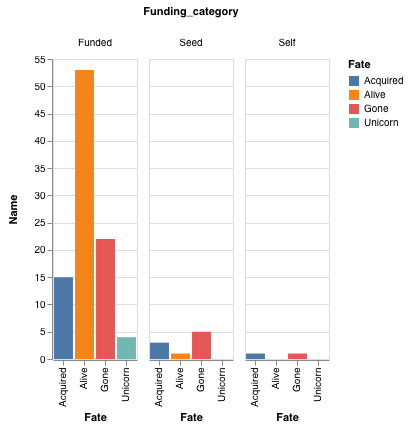

In [72]:
funding_cat = alt.Chart(uber.groupby(['Funding_category', 'Fate']).count().reset_index()).mark_bar().encode(
    
    
    alt.X('Fate:N'),
    alt.Y('Name:Q'),
    alt.Color('Fate:N'),
    column = 'Funding_category:N'
)

funding_cat

In [78]:
year = alt.Chart(uber.groupby(['Founded', 'Fate']).count().reset_index()).mark_bar().encode(
    
    
    alt.X('Fate:N'),
    alt.Y('Name:Q'),
    alt.Color('Fate:N'),
    column = 'Founded:O'
)

alt.vconcat(year, funding_cat)

SchemaValidationError: Invalid specification

        altair.vegalite.v2.api.VConcatChart->vconcat->items, validating 'anyOf'

        {'data': {'name': 'data-0f3eb0d1600bc4323dd3dce040f41a1a'}, 'mark': 'bar', 'encoding': {'color': {'type': 'nominal', 'field': 'Fate'}, 'column': {'type': 'ordinal', 'field': 'Founded'}, 'x': {'type': 'nominal', 'field': 'Fate'}, 'y': {'type': 'quantitative', 'field': 'Name'}}} is not valid under any of the given schemas
        

VConcatChart({
  vconcat: [Chart({
    data:     Founded      Fate  Name  Funding  Business  Comment  Funding_category
    0      2004   Unicorn     1        1         1        0                 1
    1      2008  Acquired     1        1         1        1                 1
    2      2010  Acquired     4        4         4        4                 4
    3      2010     Alive     3        3         3        1                 3
    4      2010      Gone     1        1         1        1                 1
    5      2011  Acquired     2        1         2        2                 2
    6      2011     Alive     2        2         2        1                 2
    7      2011      Gone     3        3         3        2                 3
    8      2011   Unicorn     1        1         1        1                 1
    9      2012  Acquired     3        3         3        3                 3
    10     2012     Alive     7        7         7        4                 7
    11     2012      Go

In [61]:
uber.query('Fate == ["Unicorn"]')

,Name,Funding,Business,Founded,Fate,Comment,Funding_category
21,Instacart,"$1,900,000,000",Delivery-Grocery,2012,Unicorn,Last round 2018,Funded
22,DoorDash,"$1,400,000,000",Delivery-Food,2013,Unicorn,Last round $535m,Funded
23,Postmates,"$678,000,000",Delivery-General,2011,Unicorn,$300 million round in 2018,Funded
26,GrubHub,"$284,100,000",Delivery-Food,2004,Unicorn,NaN,Funded
